In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
titan = pd.read_csv('titanic_train.csv')

In [4]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titan.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

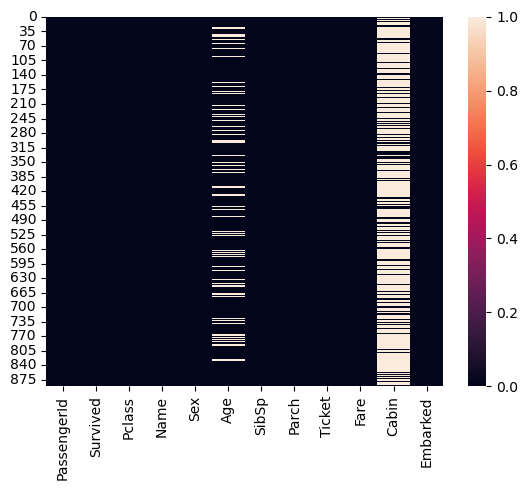

In [8]:
sns.heatmap(titan.isnull())

<Axes: >

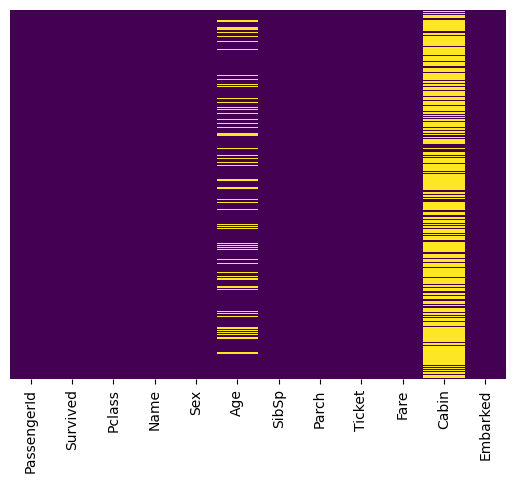

In [10]:
sns.heatmap(titan.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

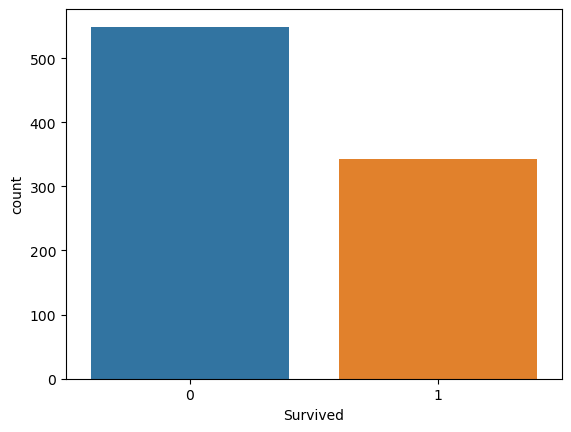

In [12]:
sns.countplot(x='Survived',data=titan)

In [13]:
titan['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

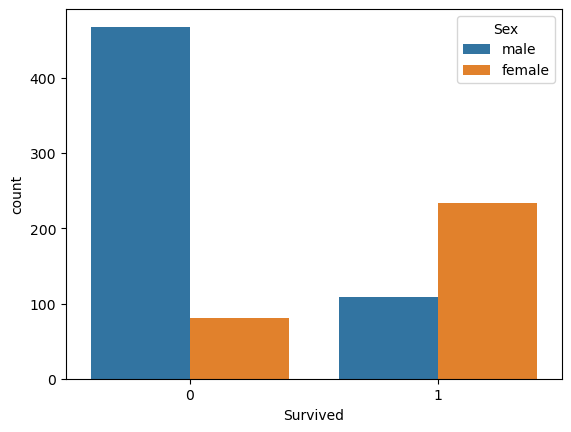

In [14]:
sns.countplot(x='Survived',data=titan,hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

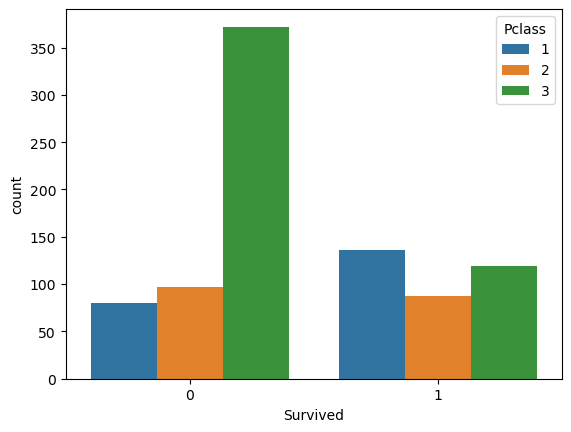

In [15]:
sns.countplot(x='Survived',data=titan,hue='Pclass')

<Axes: xlabel='Survived', ylabel='count'>

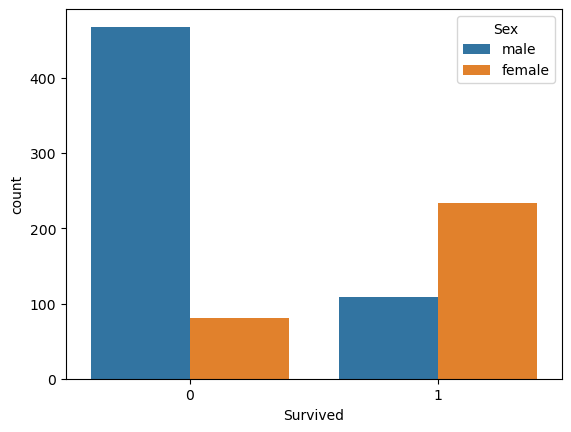

In [16]:
sns.countplot(x='Survived',hue='Sex',data=titan)

C:\Users\HP\AppData\Local\Temp\ipykernel_15200\637434810.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titan['Age']).bins=30


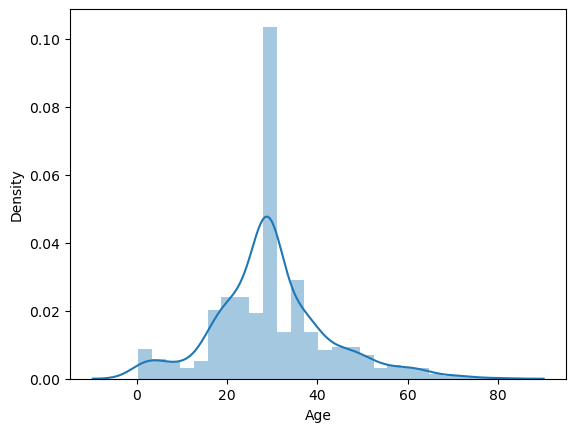

In [65]:
sns.distplot(titan['Age']).bins=30

<Axes: ylabel='Frequency'>

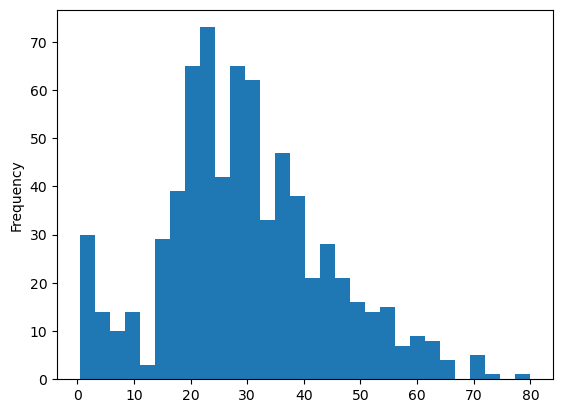

In [19]:
titan['Age'].plot.hist(bins=30)

In [27]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
    elif Pclass == 2:
        return 29
    else:
        return Age

In [79]:
#Column value  imputations
titan['Age'] = titan.apply(lambda row: impute_age(row), axis=1)
titan['Pclass'] = titan.apply(lambda row: impute_age(row), axis=1)


<Axes: >

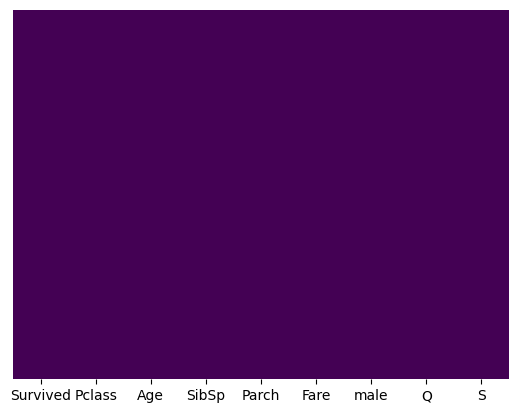

In [80]:
# titan['Age'] = titan['Age'].apply(impute_age,axis=1)
sns.heatmap(titan.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [81]:
titan['Cabin'].unique()

KeyError: 'Cabin'

In [ ]:
titan.drop('Cabin',axis=1, inplace=True)

In [ ]:
titan.head()

In [ ]:
sns.heatmap(titan.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
titan['Embarked'].unique()

In [ ]:
embarked = pd.get_dummies(titan['Embarked'],drop_first=True)

In [ ]:
embarked.head(20)

In [ ]:
Gender = pd.get_dummies(titan['Sex'],drop_first=True)

In [82]:
Gender.head()

,male
0,True
1,False
2,False
3,False
4,True


In [83]:
titan = pd.concat([titan,Gender,embarked],axis=1)

In [84]:
titan.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,0,0,1,0,7.2500,True,False,True,True,False,True
1,1,1,1,1,0,71.2833,False,False,False,False,False,False
2,1,1,1,0,0,7.9250,False,False,True,False,False,True
3,1,1,1,1,0,53.1000,False,False,True,False,False,True
4,0,0,0,0,0,8.0500,True,False,True,True,False,True


In [85]:
titan.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S',
       'male', 'Q', 'S'],
      dtype='object')

In [86]:
titan.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'],axis=1,inplace=True)

KeyError: "['PassengerId' 'Name' 'Sex' 'Ticket' 'Embarked'] not found in axis"

In [87]:
titan.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,0,0,1,0,7.2500,True,False,True,True,False,True
1,1,1,1,1,0,71.2833,False,False,False,False,False,False
2,1,1,1,0,0,7.9250,False,False,True,False,False,True
3,1,1,1,1,0,53.1000,False,False,True,False,False,True
4,0,0,0,0,0,8.0500,True,False,True,True,False,True


In [88]:
X = titan.drop('Survived',axis=1)

In [89]:
y = titan['Survived']

In [90]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
logreg = LogisticRegression()

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [95]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
6,0,0,0,0,51.8625,True,False,True,True,False,True
718,0,0,0,0,15.5000,True,True,False,True,True,False
685,29,29,1,2,41.5792,True,False,False,True,False,False
73,0,0,1,0,14.4542,True,False,False,True,False,False
882,0,0,0,0,10.5167,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
106,1,1,0,0,7.6500,False,False,True,False,False,True
270,0,0,0,0,31.0000,True,False,True,True,False,True
860,0,0,2,0,14.1083,True,False,True,True,False,True
435,1,1,1,2,120.0000,False,False,True,False,False,True


In [96]:
X_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
709,1,1,1,1,15.2458,True,False,False,True,False,False
439,29,29,0,0,10.5000,True,False,True,True,False,True
840,0,0,0,0,7.9250,True,False,True,True,False,True
720,29,29,0,1,33.0000,False,False,True,False,False,True
39,1,1,1,0,11.2417,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
715,0,0,0,0,7.6500,True,False,True,True,False,True
525,0,0,0,0,7.7500,True,True,False,True,True,False
381,1,1,0,2,15.7417,False,False,False,False,False,False
140,0,0,0,2,15.2458,False,False,False,False,False,False


In [97]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [98]:
predictions = logreg.predict(X_test)

In [99]:
from sklearn.metrics import classification_report,confusion_matrix

In [100]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.78      0.69      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



In [101]:
print(confusion_matrix(y_test,predictions))

[[151  24]
 [ 37  83]]


In [108]:
#Pickle Module (How to save the finallize which gives the best accuracy)
X_test.iloc[6:7]

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
300,1,1,0,0,7.75,False,True,False,False,True,False


In [104]:
predictions 

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [109]:
logreg.predict(X_test.iloc[6:7])

array([1], dtype=int64)

In [110]:
titan.iloc[300:301]

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
300,1,1,1,0,0,7.75,False,True,False,False,True,False


In [116]:
X_test.iloc[92:93]
logreg.predict(X_test.iloc[92:93])


array([0], dtype=int64)

In [117]:
titan.iloc[625:626]

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
625,0,0,0,0,0,32.3208,True,False,True,True,False,True


In [119]:
X_test.iloc[192:193]
logreg.predict(X_test.iloc[192:193])


array([0], dtype=int64)

In [120]:
titan.iloc[721:722]

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
721,0,0,0,1,0,7.0542,True,False,True,True,False,True
